In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
samples = np.transpose(np.loadtxt('Systems/3325.txt6 emcee samples.gz', delimiter=','))

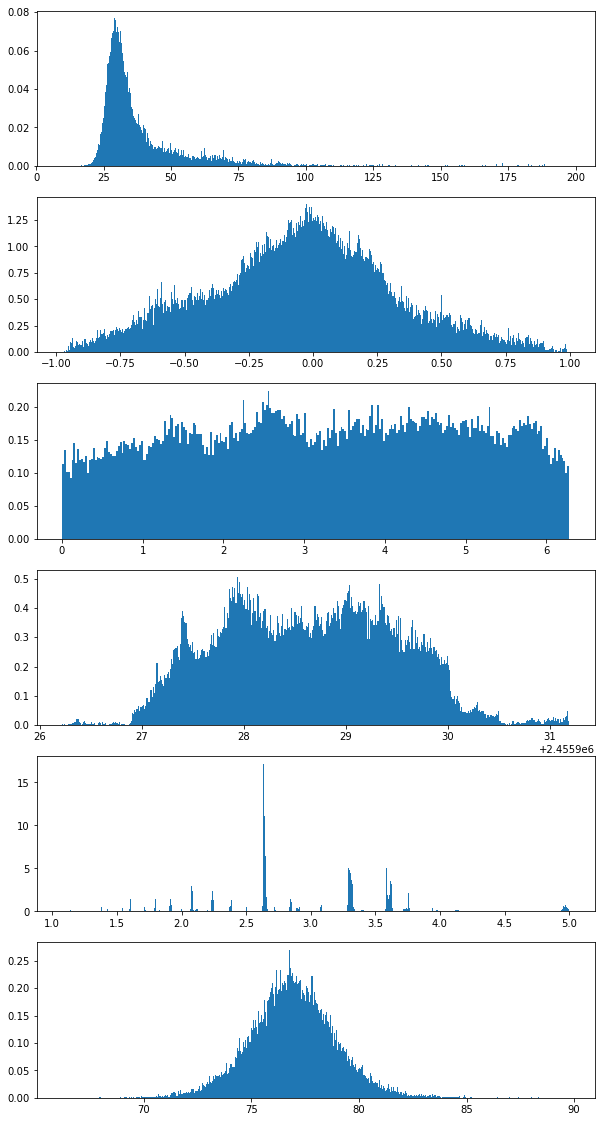

In [33]:
f, ax = plt.subplots(6)
for i in range(6):
    ax[i].hist(samples[i], bins='auto', normed=1)
f.set_figheight(20)
f.set_figwidth(10)
plt.show()

In [26]:
P = 7
times = [7, 6.8, 5, 7.5, 65, 21, 32, 14, 67]
phased_Times = np.array([])